In [1]:
import gc
gc.collect()

5

In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns
sns.set()
from collections import Counter
from nltk.corpus import stopwords

import keras
from sklearn.model_selection import train_test_split
import string
import os
import time
from PIL import Image
import glob
from pickle import dump, load
from time import time
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

In [7]:
#images='../input/flickr-image-dataset/flickr30k_images/flickr30k_images'
#text_file='../input/flickr-image-dataset/flickr30k_images/results.csv'

images='Images'
text_file='captions.txt'

In [8]:
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


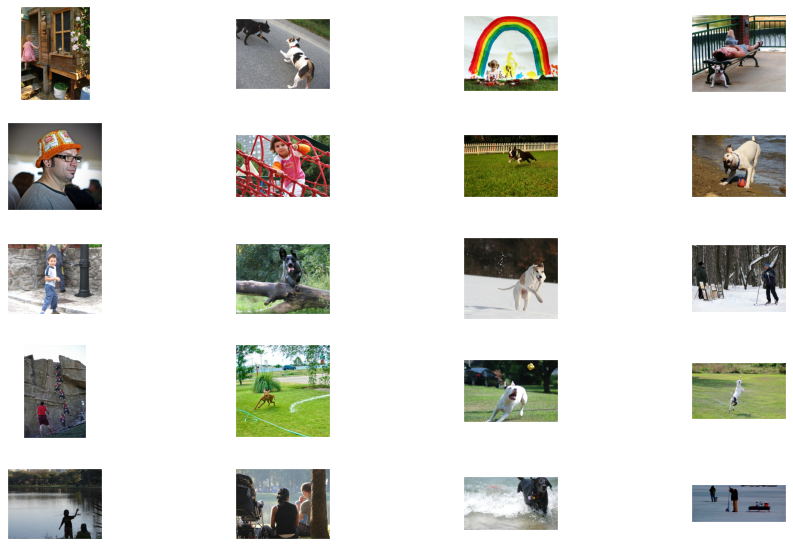

In [9]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mpimg.imread(all_imgs[i]));

In [10]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [11]:
doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [12]:
#/ this is for flickr30k dataset operation/
all_img_id=[]
all_img_vector=[]
annotations=[]
f=open(text_file,"r")
for line in f.readlines()[1:]:
    img_id=line.split('|',1)[0]
    cap=line.split('|')[-1]
    all_img_id.append(img_id)
    all_img_vector.append(images+'/'+img_id)
    annotations.append(cap.split('\n')[0])

    #print(img_id,cap)
limit = 100000
all_img_id = all_img_id[:limit]
all_img_vector = all_img_vector[:limit]
annotations=annotations[:limit]
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,"1000268201_693b08cb0e.jpg,A child in a pink dr...","Images/1000268201_693b08cb0e.jpg,A child in a ...","1000268201_693b08cb0e.jpg,A child in a pink dr..."
1,"1000268201_693b08cb0e.jpg,A girl going into a ...","Images/1000268201_693b08cb0e.jpg,A girl going ...","1000268201_693b08cb0e.jpg,A girl going into a ..."
2,"1000268201_693b08cb0e.jpg,A little girl climbi...","Images/1000268201_693b08cb0e.jpg,A little girl...","1000268201_693b08cb0e.jpg,A little girl climbi..."
3,"1000268201_693b08cb0e.jpg,A little girl climbi...","Images/1000268201_693b08cb0e.jpg,A little girl...","1000268201_693b08cb0e.jpg,A little girl climbi..."
4,"1000268201_693b08cb0e.jpg,A little girl in a p...","Images/1000268201_693b08cb0e.jpg,A little girl...","1000268201_693b08cb0e.jpg,A little girl in a p..."
...,...,...,...
40450,"997722733_0cb5439472.jpg,A man in a pink shirt...","Images/997722733_0cb5439472.jpg,A man in a pin...","997722733_0cb5439472.jpg,A man in a pink shirt..."
40451,"997722733_0cb5439472.jpg,A man is rock climbin...","Images/997722733_0cb5439472.jpg,A man is rock ...","997722733_0cb5439472.jpg,A man is rock climbin..."
40452,"997722733_0cb5439472.jpg,A person in a red shi...","Images/997722733_0cb5439472.jpg,A person in a ...","997722733_0cb5439472.jpg,A person in a red shi..."
40453,"997722733_0cb5439472.jpg,A rock climber in a r...","Images/997722733_0cb5439472.jpg,A rock climber...","997722733_0cb5439472.jpg,A rock climber in a r..."


In [13]:
#/ this is for flickr8k dataset operation/

all_img_id=[]
all_img_vector=[]
annotations=[]
f=open(text_file,"r")
for line in f.readlines()[1:]:
    img_id, cap = line.split(',', 1)
    img_id=img_id.split('.')[0]

    all_img_id.append(img_id)
    all_img_vector.append(images+'/'+img_id+'.jpg')
    annotations.append(cap.split('\n')[0])
    
df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A rock climber in a red shirt .


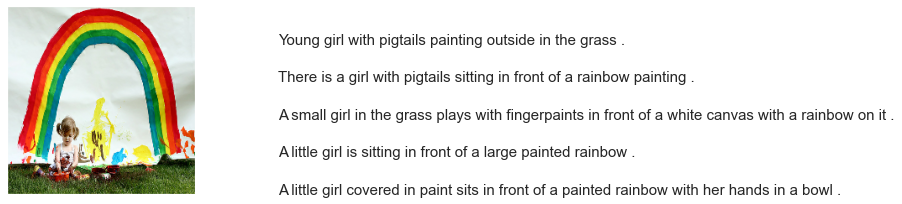

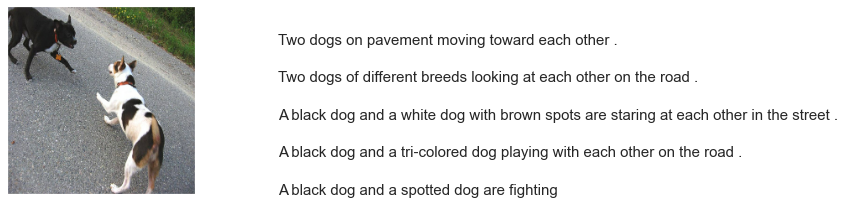

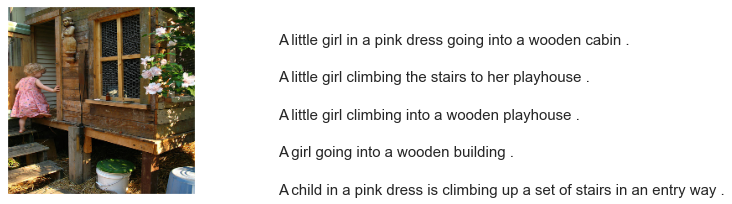

In [14]:
img_path=list(set(df.Path[:15]))
count = 1
j=0
for path in img_path:
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])
      
    fig = plt.figure(figsize=(10,20))
    ax = fig.add_subplot(5,2,count,xticks=[],yticks=[])
    ax.imshow(img)
    

    count += 1
      
    ax = fig.add_subplot(5,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,5)
    
    img_cap=df.loc[df['Path'] == path, 'Captions']
    
    for i in range(len(img_cap)):
        ax.text(0,i,img_cap.iloc[i],fontsize=15)
    count += 1
    j+=1
plt.show()


    
    

In [15]:
annotations=[]
for cap in df.Captions:
    cap='<start> '+ cap + ' <end>'
    annotations.append(cap)
annotations

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>',
 '<start> A black dog and a spotted dog are fighting <end>',
 '<start> A black dog and a tri-colored dog playing with each other on the road . <end>',
 '<start> A black dog and a white dog with brown spots are staring at each other in the street . <end>',
 '<start> Two dogs of different breeds looking at each other on the road . <end>',
 '<start> Two dogs on pavement moving toward each other . <end>',
 '<start> A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . <end>',
 '<start> A little girl is sitting in front of a large painted rainbow . <end>',
 '<start> A small girl in the grass plays 

In [16]:
all_img_vector=[]
for img_path in df.Path:
    all_img_vector.append(img_path)

all_img_vector

['Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1000268201_693b08cb0e.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1001773457_577c3a7d70.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1002674143_1b742ab4b8.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1003163366_44323f5815.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007129816_e794419615.jpg',
 'Images/1007320043_627395c3d8.jpg',
 'Images/1007320043_627395c3d8.jpg',
 

In [17]:
def gen_vocabulary():
    vocab = []
    for cap in df.Captions.values:
        vocab.extend(cap.split())
    print("Size of vocabulary: {}".format(len(set(vocab))))
    return vocab

In [18]:
vocabulary=gen_vocabulary()

Size of vocabulary: 9862


In [19]:
val_count=Counter(vocabulary)
val_count

Counter({'A': 21481,
         'child': 1477,
         'in': 18961,
         'a': 40271,
         'pink': 734,
         'dress': 347,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6712,
         'stairs': 109,
         'an': 1944,
         'entry': 1,
         'way': 50,
         '.': 34212,
         'girl': 3217,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 509,
         'little': 1625,
         'playhouse': 6,
         'the': 15328,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3696,
         'dog': 7982,
         'and': 8850,
         'spotted': 37,
         'are': 3503,
         'fighting': 132,
         'tri-colored': 14,
         'playing': 2008,
         'with': 7760,
         'each': 430,
         'other': 771,
         'on': 10729,
         'road': 388,
         'white': 3875,
         'brown': 2475,
         'spots': 29,
         'staring'

Text(0.5, 1.0, 'Top 30 occurinng words')

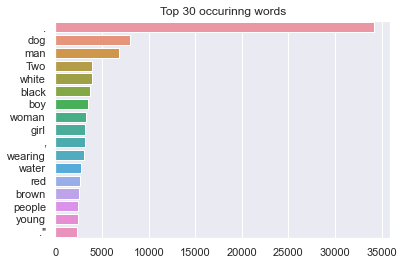

In [20]:
from nltk.corpus import stopwords
import seaborn as sns
sns.set()
sort_lst = val_count.most_common(30)
stop=set(stopwords.words('english'))
x, y=[], []
for word,count in sort_lst:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x).set_title('Top 30 occurinng words')

In [21]:
import nltk

In [22]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import pickle
def save_obj(obj, name ):
    with open('../desktop/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open('../desktop/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [40]:
save_obj(df, "dataframe")

In [41]:
df=load_obj('dataframe')
df

,ID,Path,Captions
0,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472,Images/997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [189]:
# import gc
# gc.collect()

In [43]:
image_model = keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

base_model = keras.Model(new_input, hidden_layer)

In [45]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = preprocess_input(img)
    return img, image_path

In [192]:
encode_train = sorted(set(all_img_vector))
feature_dict = {}
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)


In [193]:
len(encode_train)

8091

In [194]:

for img, path in image_dataset:
  batch_features = base_model(img)
  batch_features = tf.reshape(batch_features,(batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    feature_dict[path_of_feature] =  bf.numpy()

In [50]:
import gc
gc.collect()
len(feature_dict)

8091

In [51]:

tokenizer = keras.preprocessing.text.Tokenizer(num_words=5000,oov_token="<unk>",filters='!"#$%&()*+.-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(annotations)

train_seqs = tokenizer.texts_to_sequences(annotations)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_seqs = tokenizer.texts_to_sequences(annotations)

In [328]:
tokenizer.index_word

{1: '<unk>',
 2: 'a',
 3: '<start>',
 4: '<end>',
 5: 'in',
 6: 'the',
 7: 'on',
 8: 'is',
 9: 'and',
 10: 'dog',
 11: 'with',
 12: 'man',
 13: 'of',
 14: 'two',
 15: 'white',
 16: 'black',
 17: 'boy',
 18: 'are',
 19: 'woman',
 20: 'girl',
 21: ',',
 22: 'to',
 23: 'wearing',
 24: 'at',
 25: 'people',
 26: 'water',
 27: 'red',
 28: 'young',
 29: 'brown',
 30: 'an',
 31: 'his',
 32: 'blue',
 33: 'dogs',
 34: 'running',
 35: 'through',
 36: 'playing',
 37: 'while',
 38: 'shirt',
 39: 'down',
 40: 'standing',
 41: 'ball',
 42: 'little',
 43: 'grass',
 44: 'snow',
 45: 'child',
 46: 'person',
 47: 'jumping',
 48: 'over',
 49: 'three',
 50: 'front',
 51: 'sitting',
 52: 'holding',
 53: 'up',
 54: 'field',
 55: 'small',
 56: 'by',
 57: 'large',
 58: 'green',
 59: 'one',
 60: 'group',
 61: 'yellow',
 62: 'her',
 63: 'walking',
 64: 'children',
 65: 'men',
 66: 'into',
 67: 'air',
 68: 'beach',
 69: 'near',
 70: 'mouth',
 71: 'jumps',
 72: 'another',
 73: 'for',
 74: 'street',
 75: 'runs',
 7

In [329]:
with open("covab.pkl", 'wb') as cov:
    pickle.dump(tokenizer.index_word, cov)

In [327]:
with open("vocab.pkl", 'wb') as voc:
    pickle.dump(tokenizer.word_index, voc)


In [52]:
tokenizer.word_index

{'<unk>': 1,
 'a': 2,
 '<start>': 3,
 '<end>': 4,
 'in': 5,
 'the': 6,
 'on': 7,
 'is': 8,
 'and': 9,
 'dog': 10,
 'with': 11,
 'man': 12,
 'of': 13,
 'two': 14,
 'white': 15,
 'black': 16,
 'boy': 17,
 'are': 18,
 'woman': 19,
 'girl': 20,
 ',': 21,
 'to': 22,
 'wearing': 23,
 'at': 24,
 'people': 25,
 'water': 26,
 'red': 27,
 'young': 28,
 'brown': 29,
 'an': 30,
 'his': 31,
 'blue': 32,
 'dogs': 33,
 'running': 34,
 'through': 35,
 'playing': 36,
 'while': 37,
 'shirt': 38,
 'down': 39,
 'standing': 40,
 'ball': 41,
 'little': 42,
 'grass': 43,
 'snow': 44,
 'child': 45,
 'person': 46,
 'jumping': 47,
 'over': 48,
 'three': 49,
 'front': 50,
 'sitting': 51,
 'holding': 52,
 'up': 53,
 'field': 54,
 'small': 55,
 'by': 56,
 'large': 57,
 'green': 58,
 'one': 59,
 'group': 60,
 'yellow': 61,
 'her': 62,
 'walking': 63,
 'children': 64,
 'men': 65,
 'into': 66,
 'air': 67,
 'beach': 68,
 'near': 69,
 'mouth': 70,
 'jumps': 71,
 'another': 72,
 'for': 73,
 'street': 74,
 'runs': 75,
 '

In [53]:
annotations[:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A girl going into a wooden building . <end>',
 '<start> A little girl climbing into a wooden playhouse . <end>',
 '<start> A little girl climbing the stairs to her playhouse . <end>',
 '<start> A little girl in a pink dress going into a wooden cabin . <end>']

In [54]:
train_seqs[:5]

[[3, 2, 45, 5, 2, 92, 174, 8, 121, 53, 2, 395, 13, 396, 5, 30, 1, 672, 4],
 [3, 2, 20, 318, 66, 2, 198, 119, 4],
 [3, 2, 42, 20, 121, 66, 2, 198, 2439, 4],
 [3, 2, 42, 20, 121, 6, 396, 22, 62, 2439, 4],
 [3, 2, 42, 20, 5, 2, 92, 174, 318, 66, 2, 198, 2983, 4]]

In [55]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('a', 62992),
             ('child', 1545),
             ('in', 18986),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('<end>', 40455),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 510),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18419),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8862),
             ('spotted', 38),
             ('are', 3504),
             ('fighting', 133),
             ('tri', 14),
             ('color

Text(0.5, 1.0, 'Top 30 occurinng words')

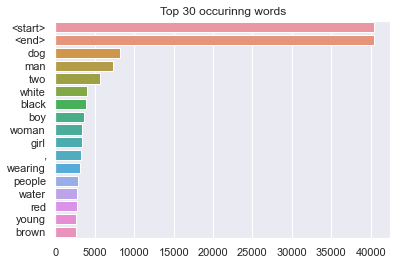

In [56]:
sorted_by_word_count = sorted(tokenizer.word_counts.items(), key=lambda kv: kv[1], reverse=True)
x, y=[], []
for word,count in sorted_by_word_count[:30]:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)
            
sns.barplot(x=y,y=x).set_title('Top 30 occurinng words')

In [57]:
def calc_max_length(tensor):
    max_t=max(len(t) for t in tensor)
    print("The maximum length of a sentence in the annotation dataset is: " + str(max_t) )
    return max_t

In [58]:
max_length = calc_max_length(train_seqs)
cap_vector = keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post', maxlen=max_length)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The maximum length of a sentence in the annotation dataset is: 40
The shape of Caption vector is :(40455, 40)


In [224]:
img_train, img_test, cap_train, cap_test = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [225]:
print("Training data for images: " + str(len(img_train)))
print("Testing data for images: " + str(len(img_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [226]:
save_obj(img_train, "img_train")
save_obj(cap_train, "cap_train")
save_obj(img_test, "img_test")
save_obj(cap_test, "cap_test")

In [227]:
def map_func(img_name, cap):
  img_tensor = feature_dict[img_name.decode('utf-8')]
  return img_tensor, cap

In [325]:
BATCH_SIZE = 32
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
train_num_steps = len(img_train) // BATCH_SIZE
test_num_steps = len(img_test) // BATCH_SIZE
features_shape = bf.shape[1]
attention_features_shape = bf.shape[0]
print(attention_features_shape)

64


In [229]:
def gen_dataset(img_data, cap_data):
    
    dataset = tf.data.Dataset.from_tensor_slices((img_data, cap_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [230]:
train_dataset=gen_dataset(img_train,cap_train)
test_dataset=gen_dataset(img_test,cap_test)

In [231]:
dataset = train_dataset.take(1)
for img,cap in dataset:
  print(img.shape)
  print(cap.shape)

(32, 64, 2048)
(32, 40)


In [243]:


class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

encoder = Encoder(embedding_dim)



In [244]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

In [245]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [247]:

decoder=Decoder(embedding_dim, units, vocab_size)

In [248]:
attention=Attention_model(units)

In [249]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape) 
print(sample_cap_batch.shape)

(32, 64, 2048)
(32, 40)


In [250]:
features=encoder(sample_img_batch)
features.shape

TensorShape([32, 64, 256])

In [251]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


In [253]:
dummy_dataset = train_dataset.take(1)
for img,cap in dummy_dataset:
    features=encoder(img)
    hidden = decoder.init_state(batch_size=cap.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * cap.shape[0], 1)
    context_vector, attention_weights=attention(features, hidden)
    predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
    print(features.shape)
    print(predictions.shape)
    print(attention_weights.shape)
    print(context_vector.shape)

(32, 64, 256)
(32, 5001)
(32, 64, 1)
(32, 256)


In [267]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [268]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [269]:
os.makedirs('checkpoints/train')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'checkpoints/train'

In [270]:
checkpoint_path = "checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [271]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [273]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [262]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [274]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [332]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|                                                                                           | 0/15 [00:23<?, ?it/s]


KeyboardInterrupt: 

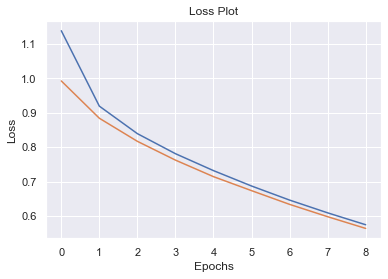

In [276]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [283]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [291]:
def beam_evaluate(image, beam_index = 3):
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = base_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption



In [292]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [293]:
from nltk.translate.bleu_score import sentence_bleu

In [294]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

BELU score: 16.34498379256302
Real Caption: a dog looking at a tennis ball floating in a pool
Prediction Caption: a dog is jumping off a blue tiled floor


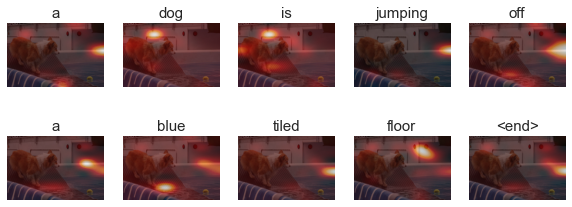

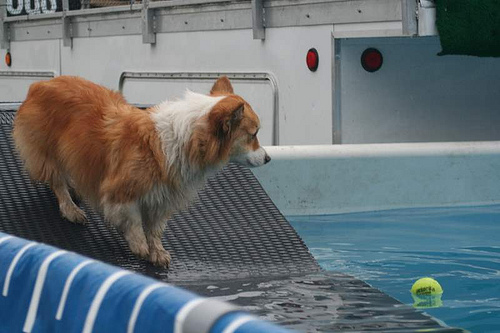

In [320]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './dataset/Flickr8k/Flicker8k_Dataset/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [296]:
captions=beam_evaluate(test_image)
print(captions)

a dog splashing in the stick in the stick in a stick in the stick in a stick in the stick in a stick in the stick in a stick in the stick in a stick in the stick


In [297]:
!pip install gtts


In [298]:
!pip install playsound

In [299]:
from gtts import gTTS
from playsound import playsound


In [300]:
from IPython import display


In [314]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :


    test_image="C:/Users/debje/Desktop/Images/106490881_5a2dd9b7bd.jpg"
    result, attention_plot, pred_test = evaluate(test_image)
     
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    candidate = pred_caption.split()

    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image
    


Prediction Caption: a little boy in swim trunks is standing on the beach


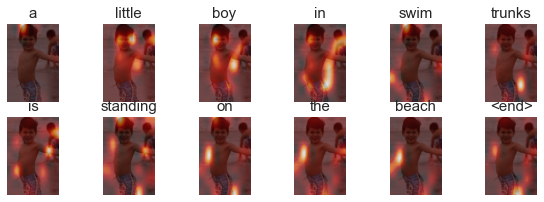

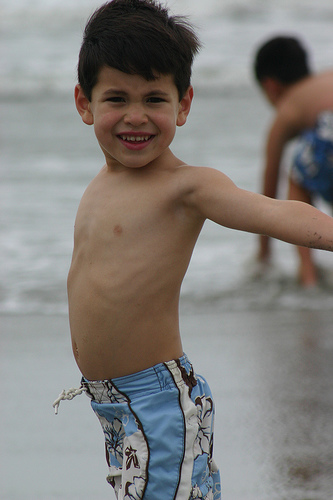

In [321]:
test_image = pred_caption_audio(len(test_image))
Image.open(test_image)

In [330]:
filename="model.h5"
base_model.save(filename)